In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

MODELOS DE CLASIFICACIÓN

Dataset Kaggle: Epileptic Seizure Recognition
https://www.kaggle.com/datasets/yasserhessein/epileptic-seizure-recognition/data

El dataset esta organizado de tal forma que cada fila (11500) contiene información de electroencefalograma (EEG) y el ultimo elemento corresponde a la clasificación de actividad cerebral del paciente, 1 corresponde a ataque o convulsion epileptica y los demas items (2, 3, 4, 5) corresponden a otros comportamientos normales del cerebro, en otras palabras, actividad normal. Estos items clasificatorios se encuentran en la ultima columna llamada "y".

In [2]:
df = pd.read_csv("Epileptic Seizure Recognition.csv")
df

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


In [3]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


DataFrame.count
Count number of non-NA/null observations.

DataFrame.max
Maximum of the values in the object.

DataFrame.min
Minimum of the values in the object.

DataFrame.mean
Mean of the values.

DataFrame.std
Standard deviation of the observations.

For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.

In [4]:
#obtain shape of dataset
df.shape

(11500, 180)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [6]:
df.columns

Index(['Unnamed', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       ...
       'X170', 'X171', 'X172', 'X173', 'X174', 'X175', 'X176', 'X177', 'X178',
       'y'],
      dtype='object', length=180)

In [7]:
#check for any null values and drop if any
df.isnull().values.any()
df.dropna()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


In [8]:
df.drop("Unnamed", axis = 1, inplace=True)

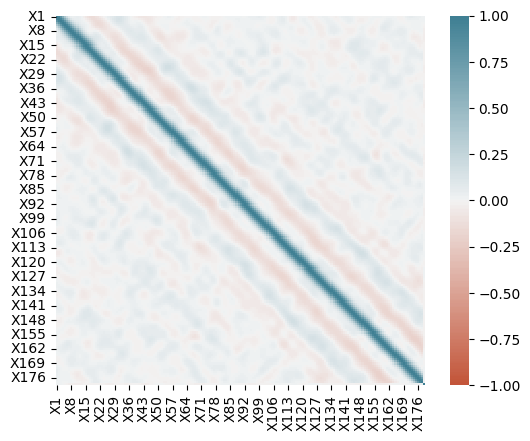

In [9]:
correlacion = df.corr()
ax = sns.heatmap(
  correlacion,
     vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True 

)

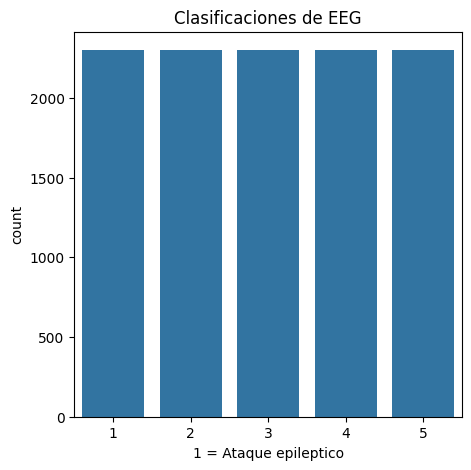

In [10]:
f1, ax1 = plt.subplots(figsize=(5,5))
sns.countplot(x='y', data = df)
plt.title('Clasificaciones de EEG')
plt.xlabel('1 = Ataque epileptico')
plt.show()

DEFINICIÓN DEL TARGET

In [11]:
target = df.y
target[target != 1] = 0

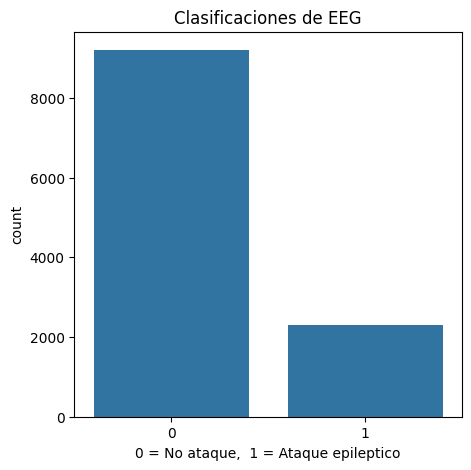

In [12]:
f, ax = plt.subplots(figsize=(5,5))
sns.countplot(x='y', data = df)
plt.title('Clasificaciones de EEG')
plt.xlabel('0 = No ataque,  1 = Ataque epileptico')
plt.show()

In [13]:
target.value_counts()

y
0    9200
1    2300
Name: count, dtype: int64

SEPARACIÓN DE LOS DATOS 

In [14]:
X_data = df.drop("y", axis = 1)
y_convulsion = df["y"]

In [15]:
X_train, X_text, y_train, y_test = train_test_split(X_data, y_convulsion, test_size= 0.3, random_state=42)

REGRESIÓN LOGISTICA

In [16]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_predict =logmodel.predict(X_text)
X_text.shape

(3450, 178)

In [18]:
confusion_matrix(y_test, y_predict)

array([[1922,  830],
       [ 409,  289]], dtype=int64)

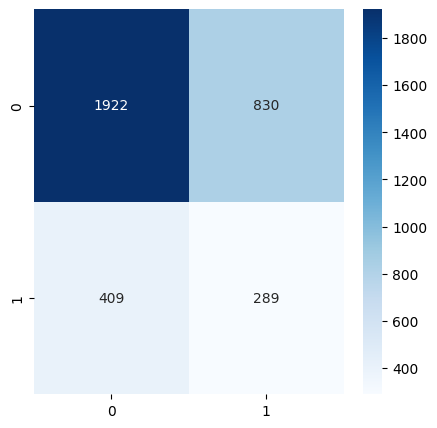

In [19]:
plt.figure(figsize= (5,5))
sns.heatmap(confusion_matrix(y_test, y_predict), annot= True, fmt='g', cmap='Blues')
plt.show()

In [20]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.70      0.76      2752
           1       0.26      0.41      0.32       698

    accuracy                           0.64      3450
   macro avg       0.54      0.56      0.54      3450
weighted avg       0.71      0.64      0.67      3450



Debido al desbalance que existe entre los datos podemos darnos cuenta de que el modelo predice de tal forma que las metricas y la matriz de confusión muestran resultados bajos o no muy buenos. Ademas debido a la no linealidad que siguen los datos de EEG el modelo tambien se ve afectado debido a que la regresion logistica aunque no esta basada en una función lineal porque sabemos que esta basada en la funcion S si requiere datos lineales para transformarlos en probabilidad. 

KNN, k = 1

In [21]:
knnmodelk1 = KNeighborsClassifier(n_neighbors = 1) 
knnmodelk1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
y_predict_k1= knnmodelk1.predict(X_text)

In [23]:
confusion_matrix(y_test, y_predict_k1)

array([[2744,    8],
       [ 184,  514]], dtype=int64)

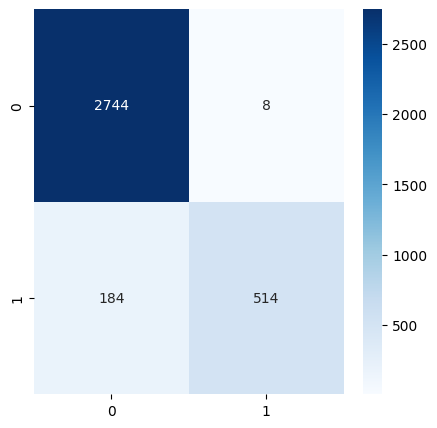

In [24]:
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(y_test, y_predict_k1) , annot= True, fmt='g', cmap='Blues')
plt.show()

In [25]:
print(classification_report(y_test, y_predict_k1))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2752
           1       0.98      0.74      0.84       698

    accuracy                           0.94      3450
   macro avg       0.96      0.87      0.90      3450
weighted avg       0.95      0.94      0.94      3450



El modelo KNN supera claramente a la regresión logística en términos de metricas, especialmente para la clase minoritaria (convulsiones epilépticas).
 - La regresión logística muestra una pobre capacidad para identificar correctamente las convulsiones epilépticas, con muchos falsos negativos.
La superioridad de Knn con respecto a la regresion logistica puede deberse a que knn es mejor con datos no lineales que la regresion logistica.

KNN, k = 2

In [26]:
knnmodelk2 = KNeighborsClassifier(n_neighbors = 2) 
knnmodelk2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [27]:
y_predict_k2= knnmodelk2.predict(X_text)

In [28]:
confusion_matrix(y_test, y_predict_k2)

array([[2751,    1],
       [ 285,  413]], dtype=int64)

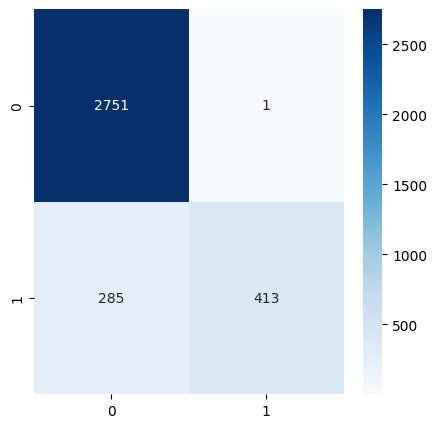

In [29]:
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(y_test, y_predict_k2) , annot= True, fmt='g', cmap='Blues')
plt.show()

In [30]:
print(classification_report(y_test, y_predict_k2))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2752
           1       1.00      0.59      0.74       698

    accuracy                           0.92      3450
   macro avg       0.95      0.80      0.85      3450
weighted avg       0.92      0.92      0.91      3450



Con un modelo knn de n = 2 vemos que el numero de falsos negativos decrece pero es un trade off con respecto a los verdaderos positivos que tambien decrecieron.

NAIVE BAYES

In [31]:
gnbModel = GaussianNB()
gnbModel.fit(X_train, y_train)

GaussianNB()

In [32]:
y_predict = gnbModel.predict(X_text)

In [33]:
confusion_matrix(y_test, y_predict)

array([[2679,   73],
       [  70,  628]], dtype=int64)

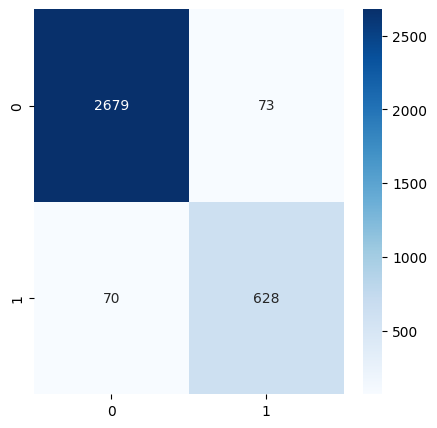

In [34]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='g', cmap='Blues')
plt.show()

In [35]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2752
           1       0.90      0.90      0.90       698

    accuracy                           0.96      3450
   macro avg       0.94      0.94      0.94      3450
weighted avg       0.96      0.96      0.96      3450



SVM 

In [36]:
#svmModel = SVC(kernel='linear')  

correr esta linea de código usando kernel lineal demoro mas de 700 minutos.

In [37]:
svmModel = SVC(kernel='rbf') 
svmModel.fit(X_train, y_train)

SVC()

correr esta linea de código usando kernel RBF se realizo inmediatamente a diferencia del uso de kernel lineal debdio a que este es uno no lineal y como ya se dijo antes los datos tienen naturaleza no lineal.

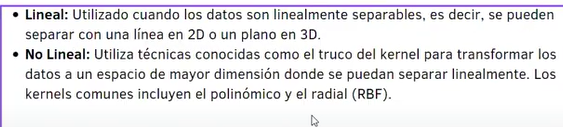

In [38]:
y_predict = svmModel.predict(X_text)

In [39]:
confusion_matrix(y_test, y_predict)


array([[2724,   28],
       [  63,  635]], dtype=int64)

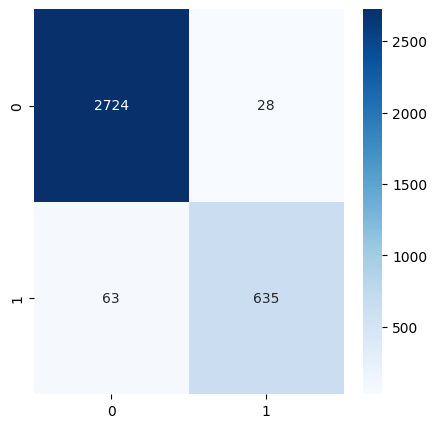

In [40]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='g', cmap='Blues')
plt.show()

In [41]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2752
           1       0.96      0.91      0.93       698

    accuracy                           0.97      3450
   macro avg       0.97      0.95      0.96      3450
weighted avg       0.97      0.97      0.97      3450



ARBOL DE CLASIFICACIÓN, entropy

In [42]:
dtcModel= DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtcModel.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=0)

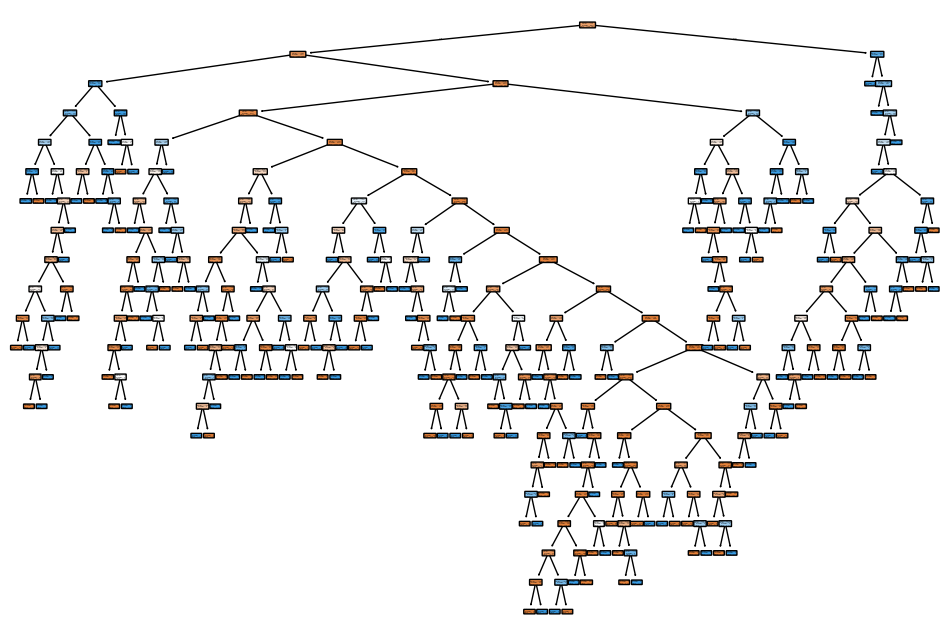

In [43]:
column_titles = list(X_data.columns)
plt.figure(figsize=(12,8))
plot_tree(dtcModel, filled=True, feature_names=column_titles, rounded=True)
plt.show()

In [44]:
y_predict = dtcModel.predict(X_text)

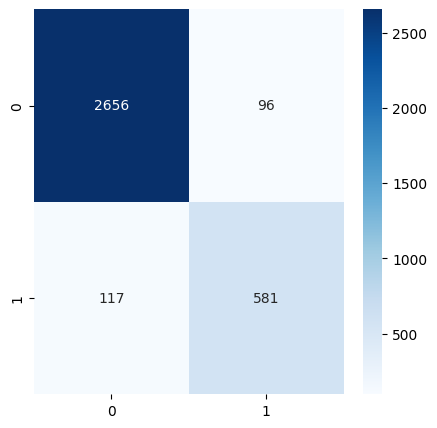

In [45]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='g', cmap='Blues')
plt.show()

In [46]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2752
           1       0.86      0.83      0.85       698

    accuracy                           0.94      3450
   macro avg       0.91      0.90      0.90      3450
weighted avg       0.94      0.94      0.94      3450



ARBOL DE CLASIFICACIÓN, Gini

In [47]:
dtcModel2= DecisionTreeClassifier(criterion = 'gini', random_state = 0)
dtcModel2.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=0)

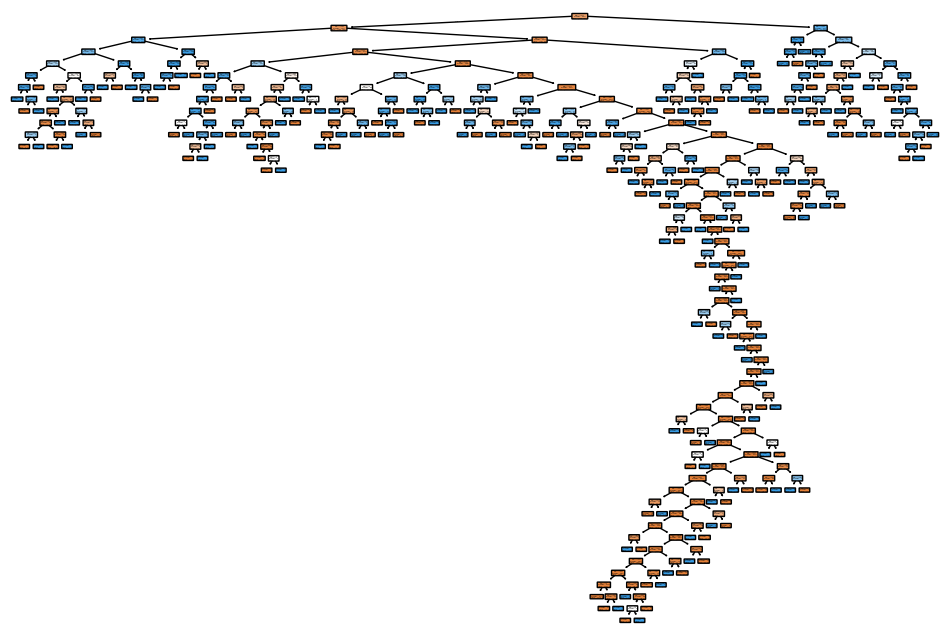

In [48]:
column_titles = list(X_data.columns)
plt.figure(figsize=(12,8))
plot_tree(dtcModel2, filled=True, feature_names=column_titles, rounded=True)
plt.show()

In [49]:
y_predict = dtcModel2.predict(X_text)

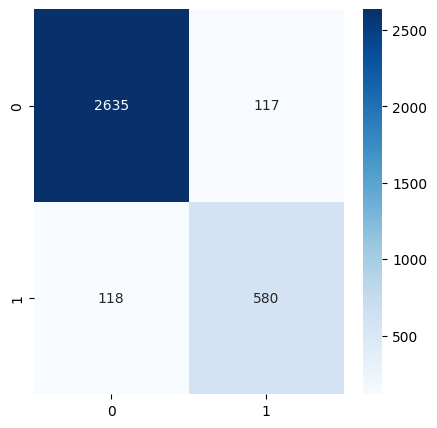

In [50]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='g', cmap='Blues')
plt.show()

In [51]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2752
           1       0.83      0.83      0.83       698

    accuracy                           0.93      3450
   macro avg       0.89      0.89      0.89      3450
weighted avg       0.93      0.93      0.93      3450



BOSQUES DE CLASIFICACIÓN, entropy

In [52]:
rfcModel = RandomForestClassifier(n_estimators = 100, criterion='entropy', random_state=0) 
rfcModel.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [53]:
y_predict = rfcModel.predict(X_text)

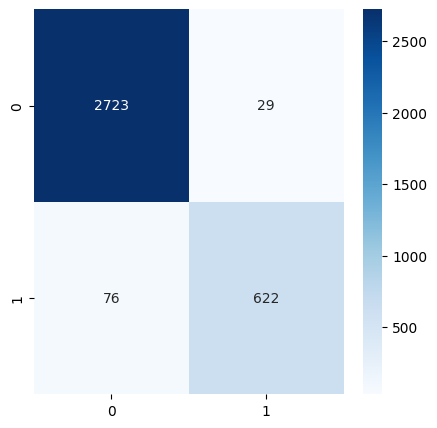

In [54]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='g', cmap='Blues')
plt.show()

In [55]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2752
           1       0.96      0.89      0.92       698

    accuracy                           0.97      3450
   macro avg       0.96      0.94      0.95      3450
weighted avg       0.97      0.97      0.97      3450



BOSQUES DE CLASIFICACIÓN, Gini

In [56]:
rfcModel2 = RandomForestClassifier(n_estimators = 100, criterion='gini', random_state=0) 
rfcModel2.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [57]:
y_predict = rfcModel2.predict(X_text)

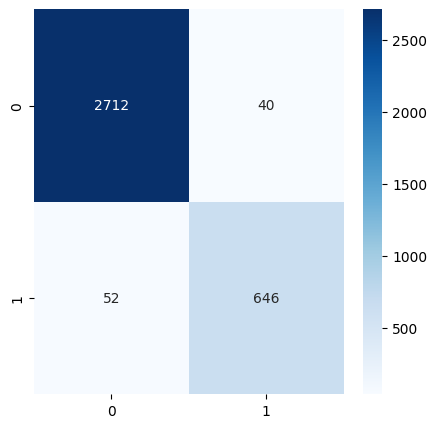

In [58]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='g', cmap='Blues')
plt.show()

In [59]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2752
           1       0.94      0.93      0.93       698

    accuracy                           0.97      3450
   macro avg       0.96      0.96      0.96      3450
weighted avg       0.97      0.97      0.97      3450

